<a href="https://colab.research.google.com/github/krishalvian/Pancreatic-Mass-Segmentation/blob/main/Contrast_Stretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contrast Stretching**

*Metode yang digunakan untuk memperbaiki atau meningkatkan kualitas citra yang berhubungan dengan pencahayaan dengan cara mengatur tingkat kecerahan dan kontras dari sebuat citra.*

---

Menghubungkan Google Drive dengan Google Colab untuk mengakses dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengimpor library yang akan digunakan untuk penelitian

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
def contrast_stretching(image):
    image_array = np.array(image)
    min_pixel = np.min(image_array)
    max_pixel = np.max(image_array)
    stretched = (image_array - min_pixel) * (230 / (max_pixel - min_pixel))
    return Image.fromarray(stretched.astype(np.uint8))

def process_folder(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path).convert('L')

            stretched_image = contrast_stretching(image)

            output_path = os.path.join(output_folder, filename)
            stretched_image.save(output_path)
            print(f"Processed: {filename} -> {output_path}")

def main():
    input_folder = '/content/drive/MyDrive/Dataset/Raw/Data/train/Processed'
    output_folder = '/content/drive/MyDrive/Dataset/Raw/Data/train/Contrast'

    process_folder(input_folder, output_folder)
    print("Processing complete.")

if __name__ == "__main__":
    main()

Processed: cropped_4804097_Rep#5#2.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4804097_Rep#5#2.jpg
Processed: cropped_4726067_Rep#1#6.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4726067_Rep#1#6.jpg
Processed: cropped_4804097_Rep#5#3.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4804097_Rep#5#3.jpg
Processed: cropped_4778583_Rep#1#1.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4778583_Rep#1#1.jpg
Processed: cropped_4778583_Rep#1#6.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4778583_Rep#1#6.jpg
Processed: cropped_4778583_Rep#1#5.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4778583_Rep#1#5.jpg
Processed: cropped_4804097_Rep#5#4.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4804097_Rep#5#4.jpg
Processed: cropped_4726067_Rep#1#4.jpg -> /content/drive/MyDrive/Dataset/Raw/Data/train/Contrast/cropped_4726067_Rep#1#4.jpg


Menampilkan hasil contrast stretching yang telah dilakukan

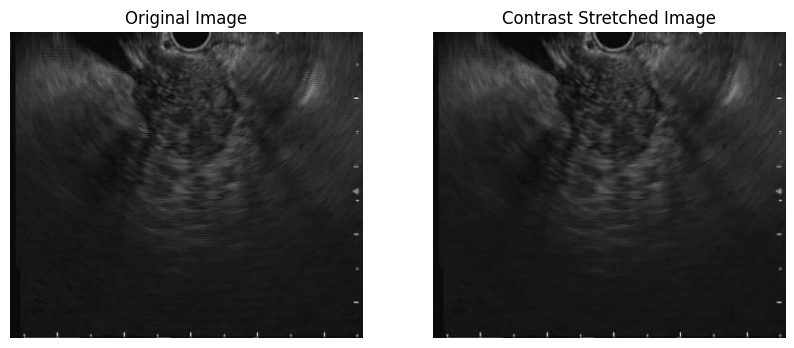

In [19]:
# Menampilkan hasil contrast stretching yang telah dilakukan
sample_image_path = os.path.join('/content/drive/MyDrive/Dataset/Raw/Data/train/Contrast', os.listdir('/content/drive/MyDrive/Dataset/Raw/Data/train/Contrast')[0])
sample_image = Image.open(sample_image_path)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
# Assuming 'input_images' folder is in the same directory as 'output_folder' and contains the original images
plt.imshow(Image.open(os.path.join('/content/drive/MyDrive/Dataset/Raw/Data/train/Processed', os.listdir('/content/drive/MyDrive/Dataset/Raw/Data/train/Processed')[0])).convert('L'), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Contrast Stretched Image')
plt.imshow(sample_image, cmap='gray')
plt.axis('off')

plt.show()

Citra diatas merupakan citra yang sudah dilakukan contrast stretching